In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset

# Update this path if needed
taxi_data = pd.read_csv("taxi_trip_pricing.csv")
taxi_data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [3]:
# Display basic information about the dataset
print("Dataset Overview:")
taxi_data.info()
print("\nSample Data:")
print(taxi_data.head())

# Step 1: Handle Missing Values
print("\nMissing Values Count:")
print(taxi_data.isnull().sum())

# Fill missing numerical values with the mean
num_cols = taxi_data.select_dtypes(include=['float64']).columns
taxi_data[num_cols] = taxi_data[num_cols].fillna(taxi_data[num_cols].mean())

# Fill missing categorical values with the mode
cat_cols = taxi_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    taxi_data[col].fillna(taxi_data[col].mode()[0], inplace=True)

# Step 2: Handle Outliers (using IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to numerical columns
for col in num_cols:
    taxi_data = remove_outliers(taxi_data, col)

# Step 3: Ensure No Missing Values Remain
print("\nMissing Values After Cleaning:")
print(taxi_data.isnull().sum())

# Step 4: Reset Index After Cleaning
taxi_data.reset_index(drop=True, inplace=True)

# Step 5: Save the Cleaned Data (Optional)
cleaned_file_path = 'cleaned_taxi_trip_pricing.csv'
taxi_data.to_csv(cleaned_file_path, index=False)

print(f"\nData Cleaning Complete! Cleaned dataset saved to '{cleaned_file_path}'.")
print("\nFinal Dataset Info:")
taxi_data.info()
print("\nSample of Cleaned Data:")
print(taxi_data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB

Sample Data:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1    

Summary Statistics:
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        970.000000       970.000000  970.000000   970.000000   
mean          24.977110         2.485944    3.498790     1.224989   
std           13.956935         1.071290    0.847381     0.414968   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.852500         2.000000    2.770000     0.870000   
50%           26.420000         2.476842    3.502989     1.233316   
75%           36.710000         3.000000    4.195000     1.560000   
max           49.990000         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
count       970.000000             970.000000  970.000000  
mean          0.292347              61.807717   51.683845  
std           0.112924              31.446046   22.471423  
min           0.100000               5.010000    6.126900  
25%           0.190000              36.582500   34.318600 

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


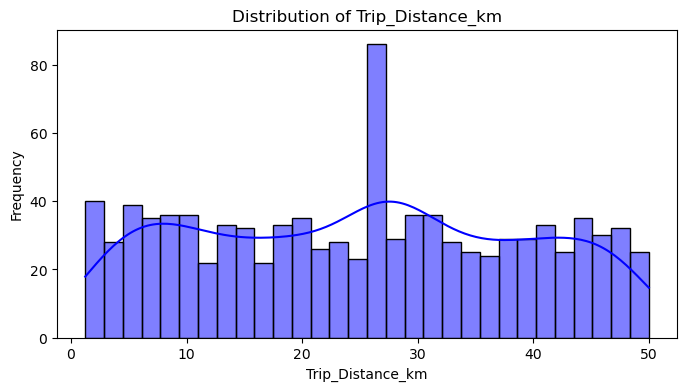

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


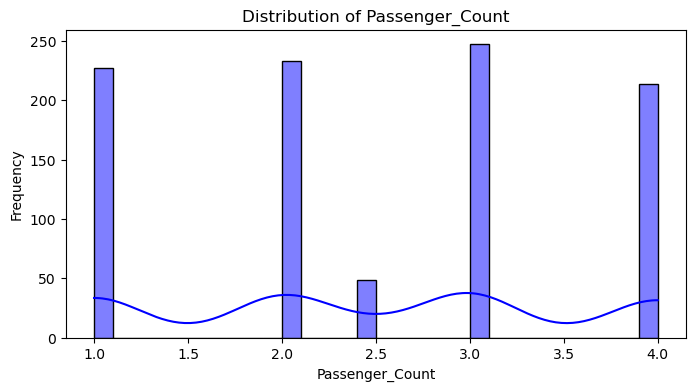

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


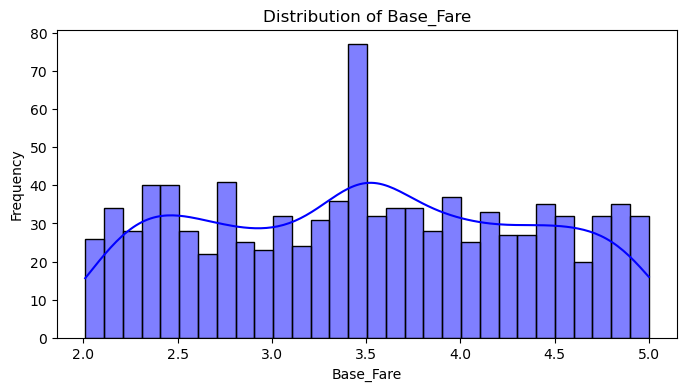

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


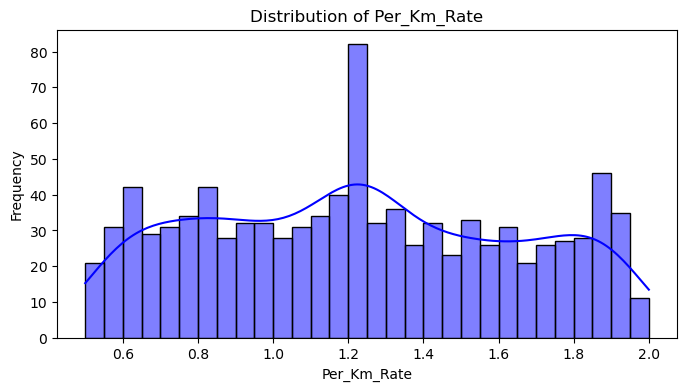

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


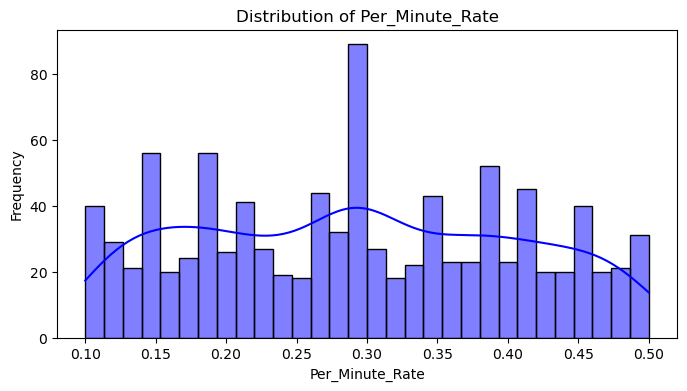

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


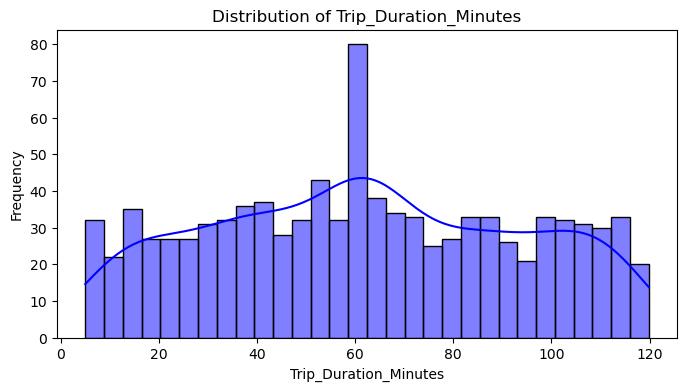

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


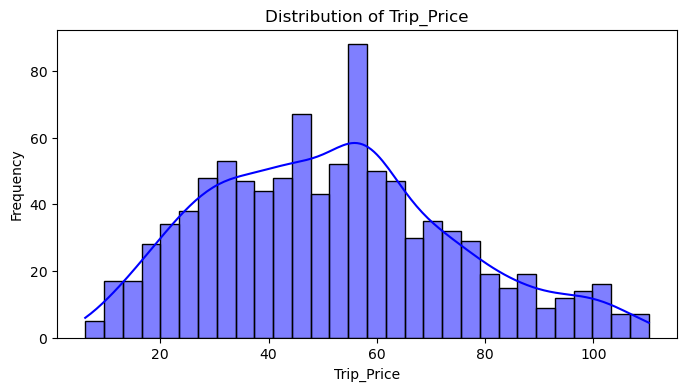


Visualizing Categorical Feature Distributions:


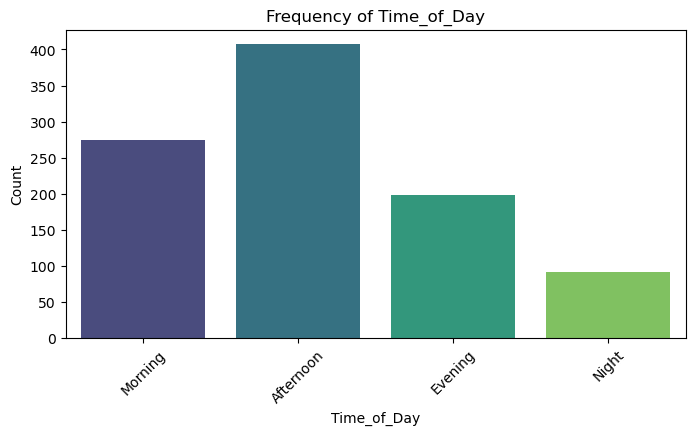

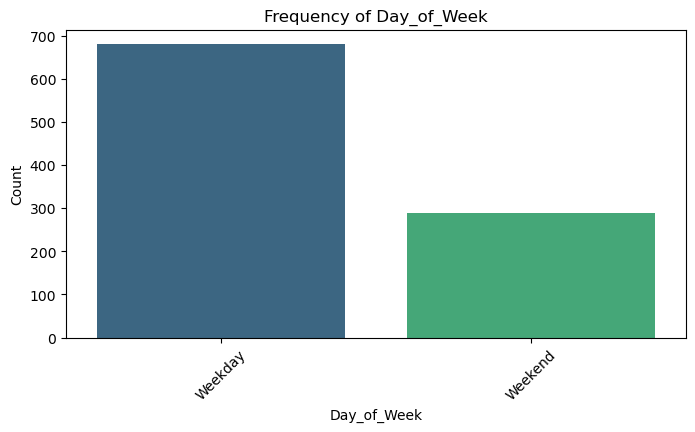

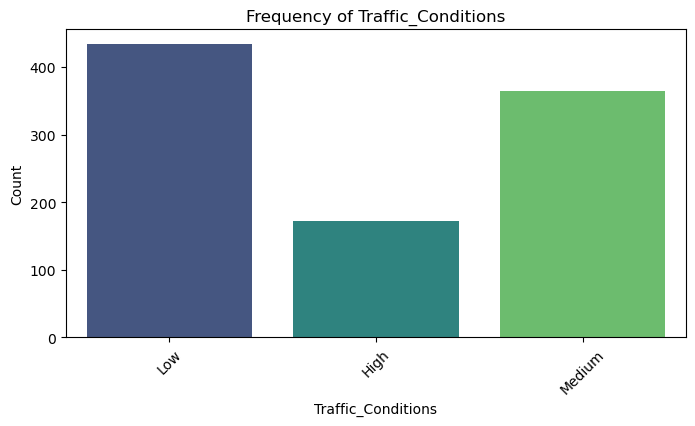

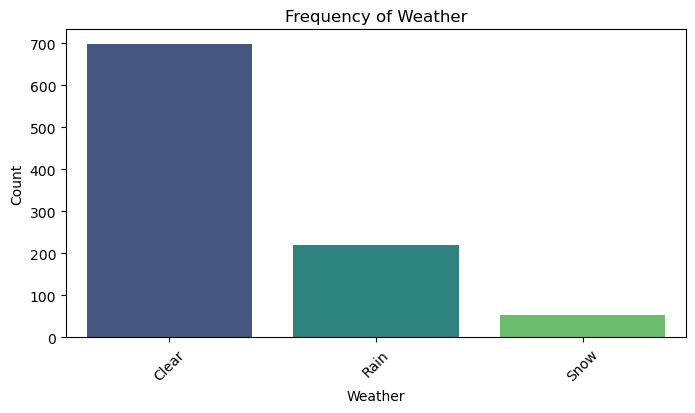

In [4]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Summary Statistics
print("Summary Statistics:")
print(taxi_data.describe())

# Step 2: Distribution of Numerical Features
num_cols = taxi_data.select_dtypes(include=['float64']).columns

print("\nVisualizing Distributions of Numerical Features:")
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(taxi_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Step 3: Categorical Features Analysis
cat_cols = taxi_data.select_dtypes(include=['object']).columns

print("\nVisualizing Categorical Feature Distributions:")
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=taxi_data, x=col, palette='viridis')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()




Correlation Matrix:


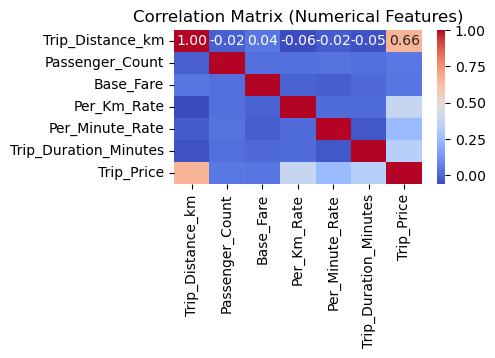

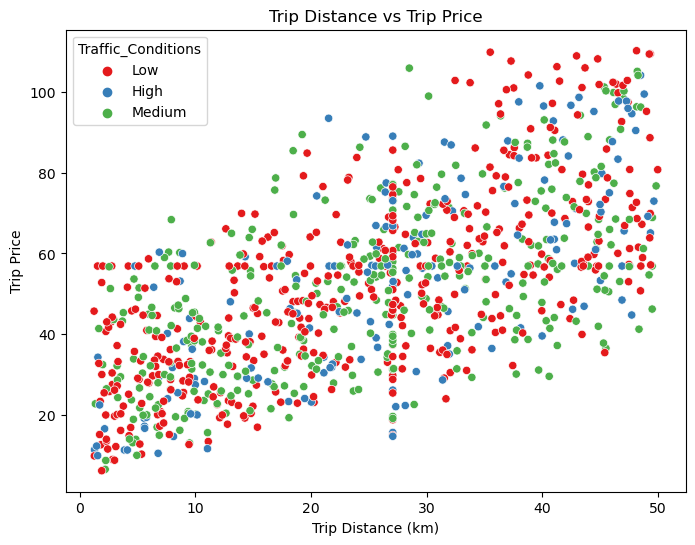

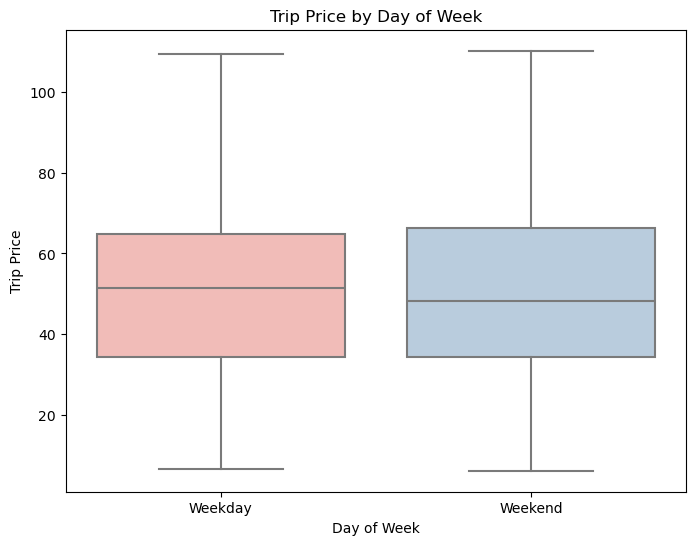

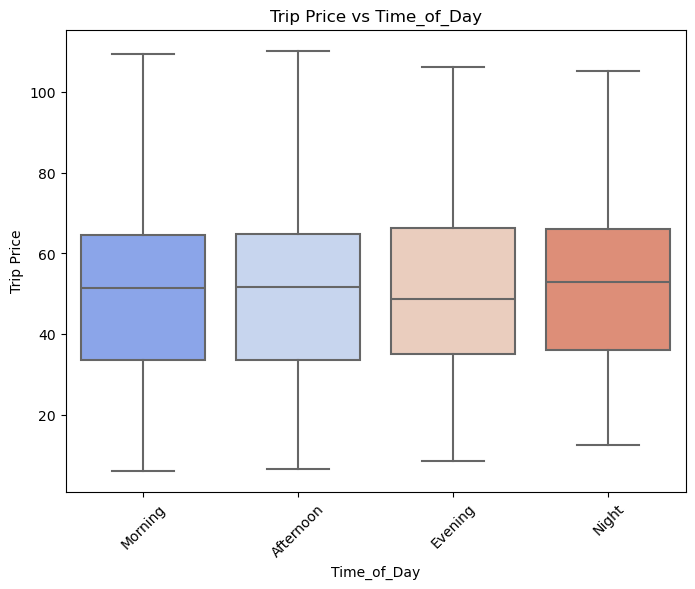

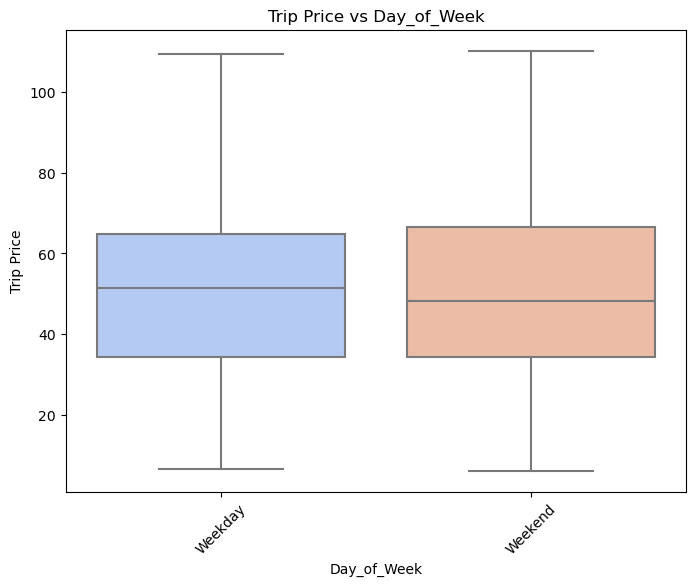

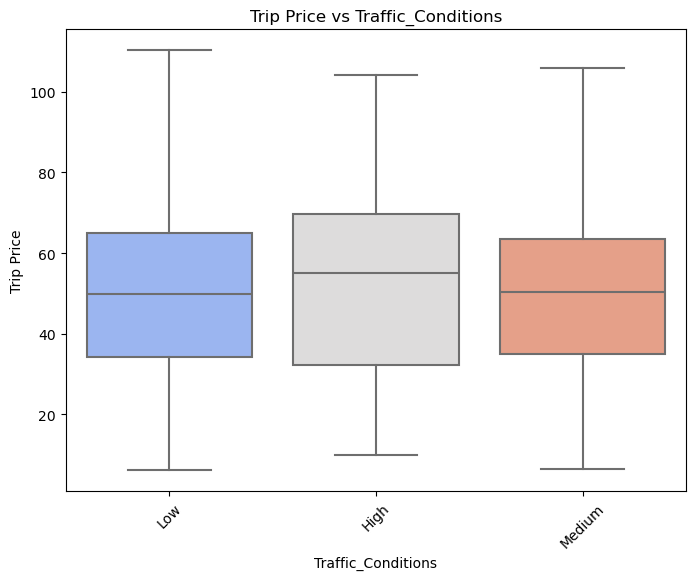

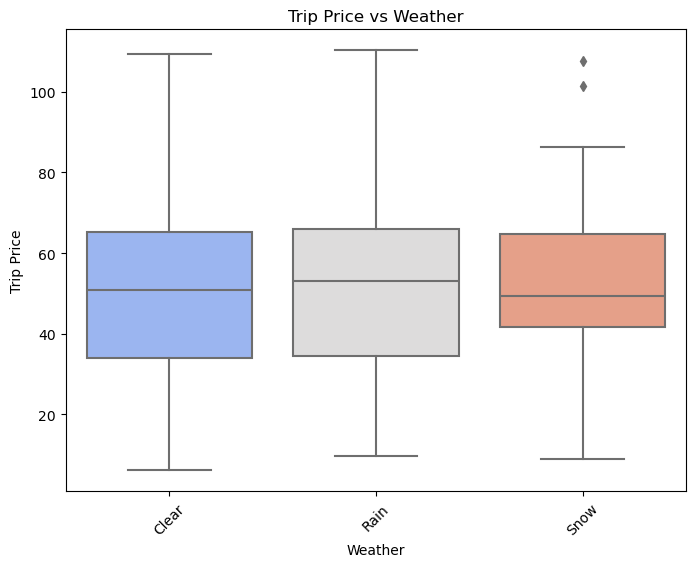

In [5]:
# Step 4: Correlation Analysis (Numerical Columns Only)
print("\nCorrelation Matrix:")

# Select only numerical columns for correlation analysis
numerical_data = taxi_data.select_dtypes(include=['float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# Step 5: Relationships Between Features
# Scatter plot: Trip Distance vs Trip Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='Trip_Distance_km', y='Trip_Price', hue='Traffic_Conditions', palette='Set1')
plt.title("Trip Distance vs Trip Price")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Price")
plt.show()

# Boxplot: Trip Price by Day of Week
plt.figure(figsize=(8, 6))
sns.boxplot(data=taxi_data, x='Day_of_Week', y='Trip_Price', palette='Pastel1')
plt.title("Trip Price by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Trip Price")
plt.show()

# Step 6: Check Feature Relationships with Trip Price
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=taxi_data, x=col, y='Trip_Price', palette='coolwarm')
    plt.title(f"Trip Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Trip Price")
    plt.xticks(rotation=45)
    plt.show()

In [6]:
# Step 3: Feature Engineering (Updated)

# Step 3.1: Create Derived Features
print("Creating Derived Features...")

# Calculate cost per kilometer and cost per minute (if not already present)
if 'Cost_per_Km' not in taxi_data.columns:
    taxi_data['Cost_per_Km'] = taxi_data['Trip_Price'] / taxi_data['Trip_Distance_km']
if 'Cost_per_Minute' not in taxi_data.columns:
    taxi_data['Cost_per_Minute'] = taxi_data['Trip_Price'] / taxi_data['Trip_Duration_Minutes']

# Step 3.2: Encode Categorical Variables (Already encoded in your dataset)
# Since columns like 'Time_of_Day_Evening', 'Traffic_Conditions_Low', etc., are already one-hot encoded,
# no need to apply one-hot encoding again. We'll proceed with these columns directly.

print("Using the following categorical columns for one-hot encoding:")
categorical_cols = [
    'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
    'Day_of_Week_Weekend', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
    'Weather_Rain', 'Weather_Snow'
]
print(categorical_cols)

# Step 3.3: Bin Numerical Features (Updated)
print("Binning Trip Distance and Trip Duration...")

# Dynamically calculate the max value for Trip_Distance_km and Trip_Duration_Minutes
max_distance = taxi_data['Trip_Distance_km'].max()
max_duration = taxi_data['Trip_Duration_Minutes'].max()

# Define bins dynamically
distance_bins = [0, 10, 30, 50, max_distance + 1]  # Adding +1 to ensure max value is included
distance_labels = ['Short', 'Medium', 'Long', 'Very Long']
taxi_data['Distance_Category'] = pd.cut(taxi_data['Trip_Distance_km'], bins=distance_bins, labels=distance_labels)

duration_bins = [0, 15, 45, 120, max_duration + 1]  # Adding +1 to ensure max value is included
duration_labels = ['Short', 'Medium', 'Long', 'Very Long']
taxi_data['Duration_Category'] = pd.cut(taxi_data['Trip_Duration_Minutes'], bins=duration_bins, labels=duration_labels)

# Step 3.4: Remove Unnecessary or Redundant Columns
print("Dropping Redundant Columns...")
redundant_cols = ['Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate']
taxi_data.drop(columns=redundant_cols, inplace=True, errors='ignore')  # Use errors='ignore' to avoid errors if columns are already dropped

# Step 3.5: Check the Updated Dataset
print("\nUpdated Dataset Info:")
print(taxi_data.info())
print("\nSample Data After Feature Engineering:")
print(taxi_data.head())

# Optional: Save the Updated Dataset
updated_file_path = 'taxi_trip_pricing_with_features.csv'
taxi_data.to_csv(updated_file_path, index=False)
print(f"\nFeature Engineering Complete! Updated dataset saved to '{updated_file_path}'.")

Creating Derived Features...
Using the following categorical columns for one-hot encoding:
['Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night', 'Day_of_Week_Weekend', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow']
Binning Trip Distance and Trip Duration...
Dropping Redundant Columns...

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       970 non-null    float64 
 1   Time_of_Day            970 non-null    object  
 2   Day_of_Week            970 non-null    object  
 3   Passenger_Count        970 non-null    float64 
 4   Traffic_Conditions     970 non-null    object  
 5   Weather                970 non-null    object  
 6   Trip_Duration_Minutes  970 non-null    float64 
 7   Trip_Price             970 non-null    float64 


Preparing Data for Correlation Analysis...
Numerical Columns: ['Trip_Distance_km', 'Passenger_Count', 'Trip_Duration_Minutes', 'Trip_Price', 'Cost_per_Km', 'Cost_per_Minute']
Calculating Correlation Matrix...
Visualizing Correlation Matrix...


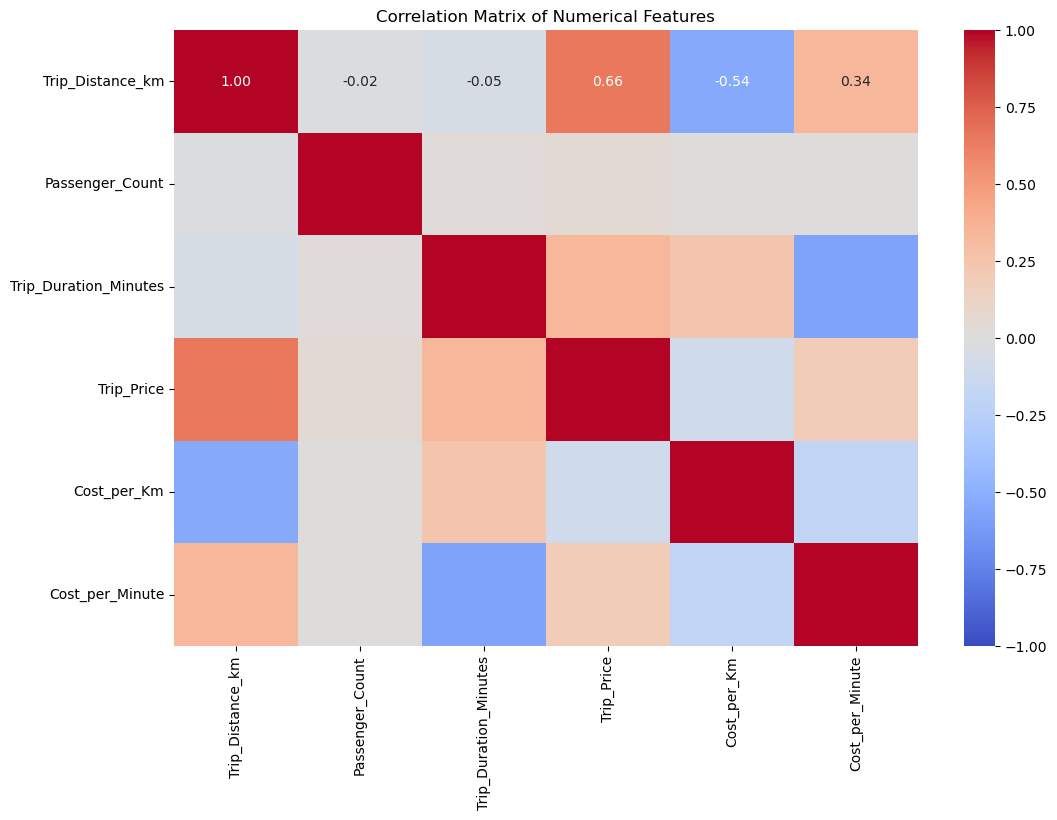


Analyzing Relationships Between Numerical and Categorical Variables...


C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


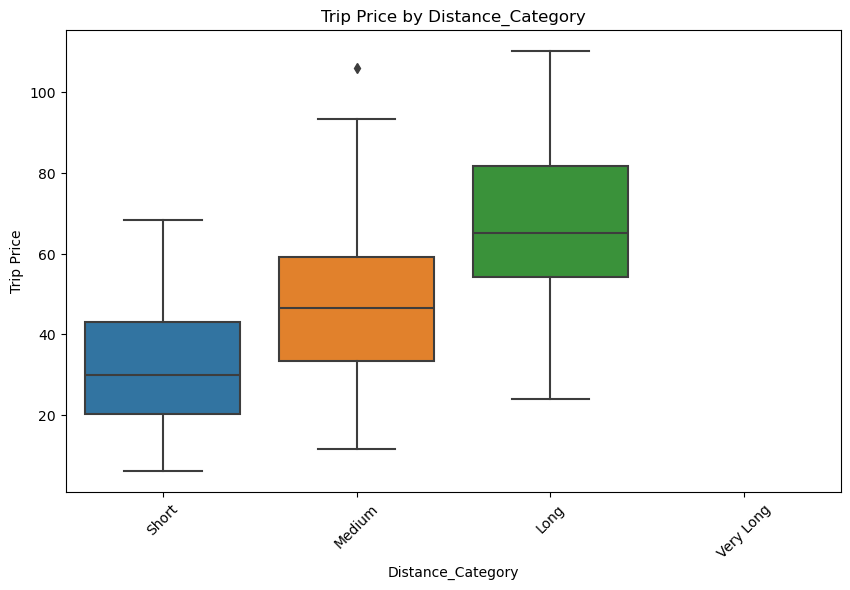

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


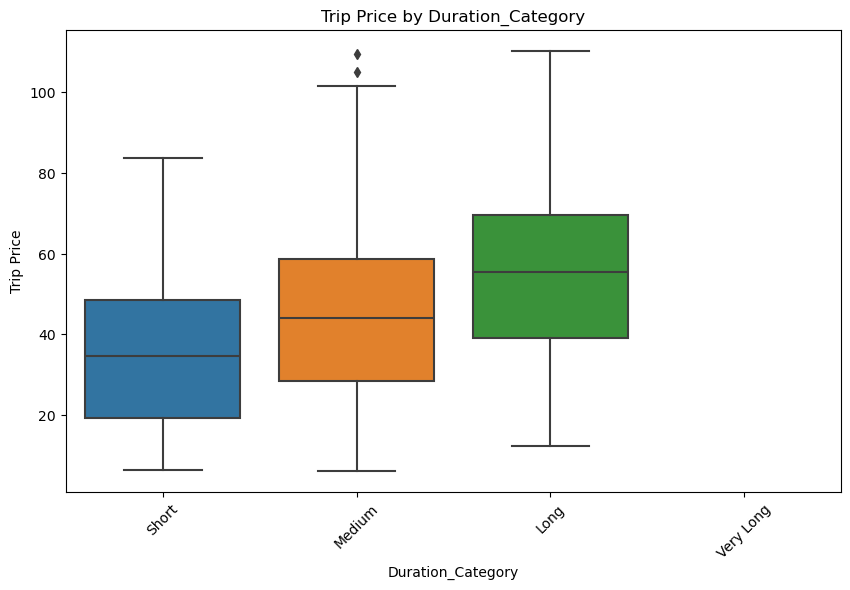

Correlation Analysis Complete!


In [7]:
# Step 4: Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Step 4.1: Prepare the Data for Correlation
print("Preparing Data for Correlation Analysis...")

# Select only numerical columns for correlation
numerical_cols = taxi_data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical Columns: {list(numerical_cols)}")

# Step 4.2: Calculate Correlation Matrix
print("Calculating Correlation Matrix...")
correlation_matrix = taxi_data[numerical_cols].corr()

# Step 4.3: Visualize the Correlation Matrix
print("Visualizing Correlation Matrix...")
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1, 
    cbar=True
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Step 4.4: Analyze Relationships Between Numerical and Categorical Variables
print("\nAnalyzing Relationships Between Numerical and Categorical Variables...")

categorical_cols = ['Distance_Category', 'Duration_Category', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 
                    'Time_of_Day_Night', 'Day_of_Week_Weekend', 'Traffic_Conditions_Low', 
                    'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow']

for cat_col in categorical_cols:
    if cat_col in taxi_data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y='Trip_Price', data=taxi_data)
        plt.title(f"Trip Price by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel("Trip Price")
        plt.xticks(rotation=45)
        plt.show()

print("Correlation Analysis Complete!")

Preparing Features and Target for Feature Selection...
Handling Numerical and Categorical Data...
Scaling Numerical Features...
Applying Feature Selection Techniques...

F-Test Results (Linear Dependency):
                 Feature     F-Score        p-Value
0       Trip_Distance_km  731.925557  1.686092e-120
2  Trip_Duration_Minutes  123.151316   5.087503e-27
4        Cost_per_Minute   37.669459   1.220733e-09
3            Cost_per_Km    9.259343   2.406200e-03
1        Passenger_Count    2.327778   1.274098e-01

Mutual Information Results (Non-Linear Dependency):
                 Feature  MI-Score
4        Cost_per_Minute  0.292009
0       Trip_Distance_km  0.290841
3            Cost_per_Km  0.231191
2  Trip_Duration_Minutes  0.117823
1        Passenger_Count  0.000000


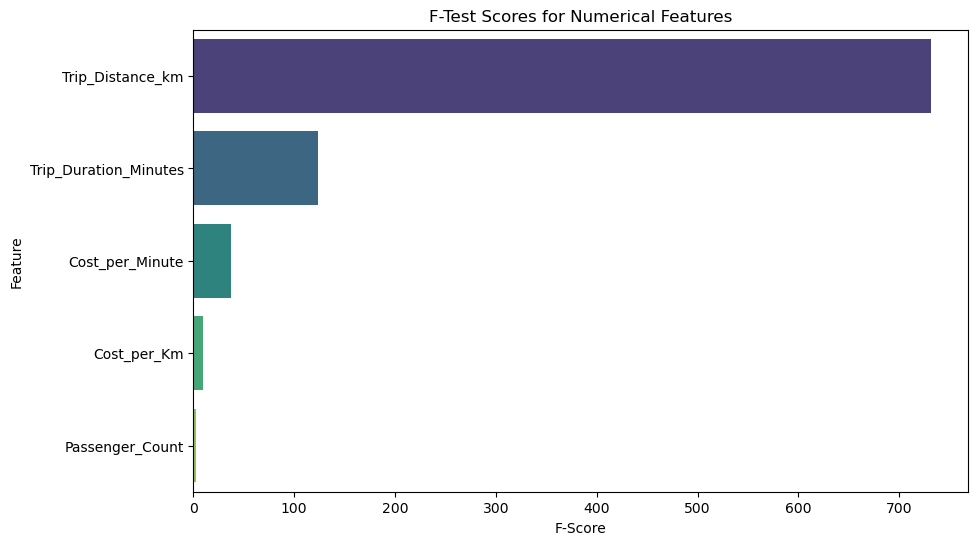

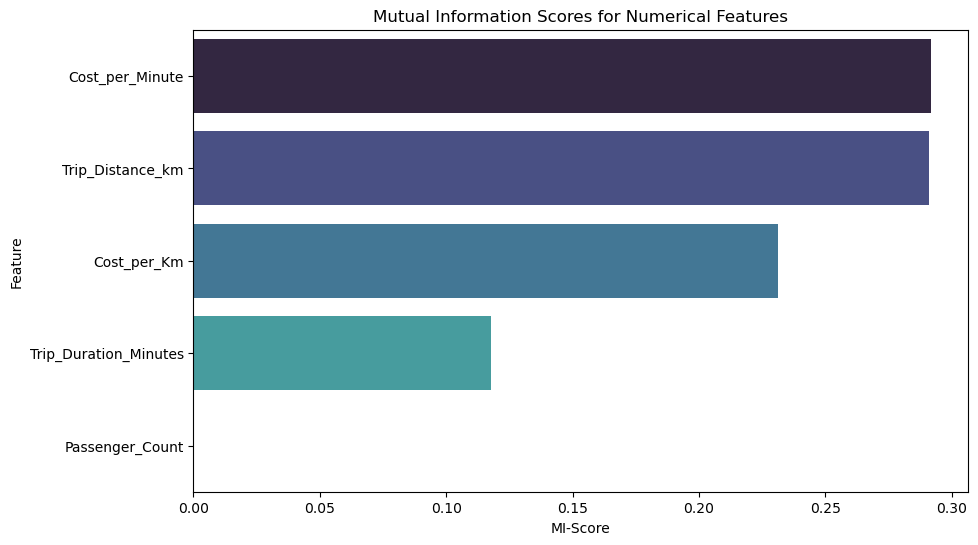

In [8]:
# Step 5: Feature Selection

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

# Step 5.1: Prepare Features and Target
print("Preparing Features and Target for Feature Selection...")

# Define target variable and features
target = 'Trip_Price'
X = taxi_data.drop(columns=['Trip_Price'])  # Features (remove target column)
y = taxi_data['Trip_Price']  # Target variable

# Step 5.2: Handle Numerical and Categorical Data Separately
print("Handling Numerical and Categorical Data...")

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Step 5.3: Scale Numerical Features (Standardization)
print("Scaling Numerical Features...")
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Step 5.4: Apply Feature Selection Techniques
print("Applying Feature Selection Techniques...")

# Method 1: F-Test (measures linear dependency with the target)
f_scores, p_values = f_regression(X[numerical_features], y)
f_test_results = pd.DataFrame({'Feature': numerical_features, 'F-Score': f_scores, 'p-Value': p_values})
f_test_results = f_test_results.sort_values(by='F-Score', ascending=False)

# Method 2: Mutual Information (measures non-linear dependency with the target)
mi_scores = mutual_info_regression(X[numerical_features], y)
mi_test_results = pd.DataFrame({'Feature': numerical_features, 'MI-Score': mi_scores})
mi_test_results = mi_test_results.sort_values(by='MI-Score', ascending=False)

# Step 5.5: Display Results
print("\nF-Test Results (Linear Dependency):")
print(f_test_results)

print("\nMutual Information Results (Non-Linear Dependency):")
print(mi_test_results)

# Step 5.6: Optional Visualization of Important Features
import matplotlib.pyplot as plt

# F-Test Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=f_test_results['F-Score'], y=f_test_results['Feature'], palette='viridis')
plt.title("F-Test Scores for Numerical Features")
plt.xlabel("F-Score")
plt.ylabel("Feature")
plt.show()

# Mutual Information Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_test_results['MI-Score'], y=mi_test_results['Feature'], palette='mako')
plt.title("Mutual Information Scores for Numerical Features")
plt.xlabel("MI-Score")
plt.ylabel("Feature")
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

y = taxi_data['Trip_Price']
X = taxi_data.drop(columns=['Trip_Price'])

# Step 6.1: One-Hot Encoding for categorical columns
# Categorical columns that need to be one-hot encoded
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Step 6.2: Label Encoding for category columns (if needed)
category_columns = ['Distance_Category', 'Duration_Category']
le = LabelEncoder()

# Label encoding the category columns
for col in category_columns:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

# Step 6.3: Scaling Numerical Features
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Trip_Duration_Minutes', 'Cost_per_Km', 'Cost_per_Minute']
scaler = StandardScaler()

# Scaling the numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Step 6.4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6.5: Train Linear Regression Model
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 6.6: Train Random Forest Regressor Model
print("Training Random Forest Regressor model...")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 6.7: Evaluate Models
print("Evaluating models...")

# Make predictions using both models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Function to evaluate the models
def evaluate_model(predictions, y_test, model_name):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Evaluate Linear Regression
evaluate_model(lr_predictions, y_test, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(rf_predictions, y_test, "Random Forest Regressor")

# Step 6.8: Save the Best Model
best_model = rf_model if r2_score(rf_predictions, y_test) > r2_score(lr_predictions, y_test) else lr_model

Training Linear Regression model...
Training Random Forest Regressor model...
Evaluating models...

Linear Regression Performance:
Mean Absolute Error (MAE): 10.77
Mean Squared Error (MSE): 191.37
Root Mean Squared Error (RMSE): 13.83
R2 Score: 0.62

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1.58
Mean Squared Error (MSE): 4.83
Root Mean Squared Error (RMSE): 2.20
R2 Score: 0.99
